## Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()
%matplotlib inline

In [2]:
#%cd C:\Users\A198199\Documents\SBSA DataScience\Jupyter Notebooks\Classification\Titanic
%cd C:\Users\Peter\Documents\Machine Learning Projects\SBSA Regression\Classification\Titanic\titanic
%ls

C:\Users\Peter\Documents\Machine Learning Projects\SBSA Regression\Classification\Titanic\titanic
 Volume in drive C has no label.
 Volume Serial Number is C41F-BCB2

 Directory of C:\Users\Peter\Documents\Machine Learning Projects\SBSA Regression\Classification\Titanic\titanic

06/11/2019  12:44 PM    <DIR>          .
06/11/2019  12:44 PM    <DIR>          ..
06/10/2019  10:37 AM             3,258 gender_submission.csv
06/11/2019  12:44 PM             3,258 submission.csv
06/10/2019  10:37 AM            28,629 test.csv
06/10/2019  10:37 AM            61,194 train.csv
               4 File(s)         96,339 bytes
               2 Dir(s)  271,176,036,352 bytes free


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train_copy = train.copy()
test_copy = test.copy()

## Data Exploration

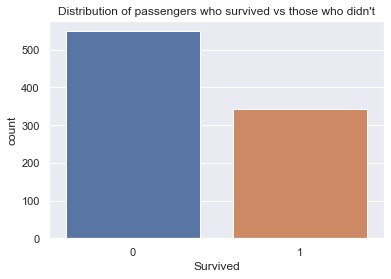

In [8]:
#Exploring the target variable

sns.countplot(x='Survived',
             data=train)
plt.title('Distribution of passengers who survived vs those who didn\'t');

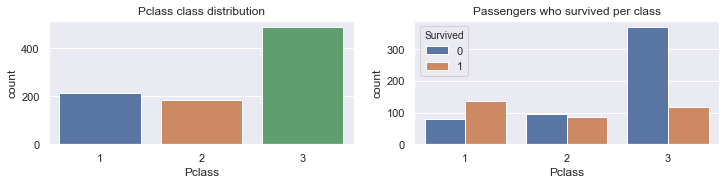

In [9]:
#Visualizing passenger class and survivability.

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(2,2,1)
sns.countplot(x='Pclass', data = train)
plt.title('Pclass class distribution')
ax2 = fig.add_subplot(2,2,2)
sns.countplot(x='Pclass',data=train,hue='Survived')
plt.title('Passengers who survived per class');

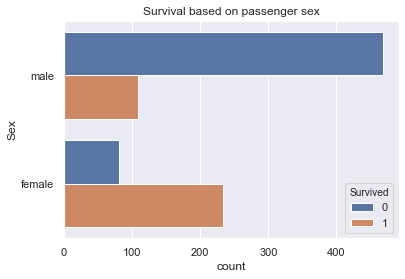

In [10]:
#Visualizing sex of the passengers

sns.countplot(y='Sex',data=train, hue='Survived')
plt.title('Survival based on passenger sex');

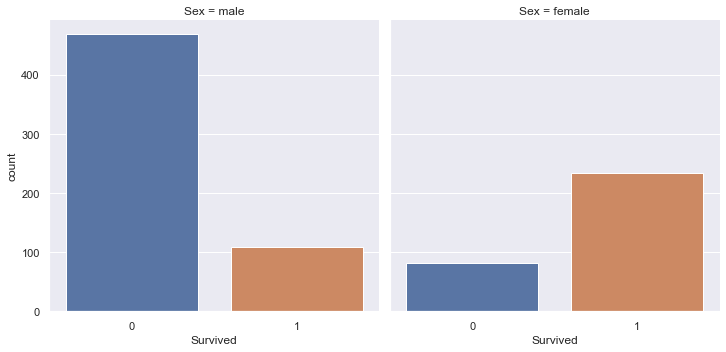

In [11]:
sns.catplot(x='Survived', col='Sex', kind='count', data=train);

Female Passengers were more likely to survive than males

C:\Users\Peter\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


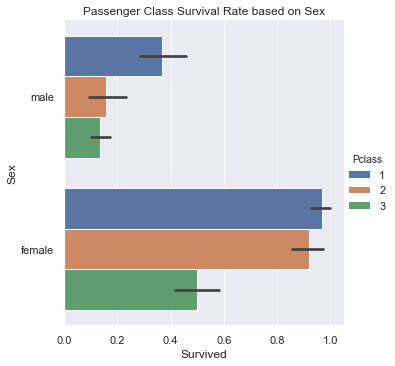

In [12]:
sns.catplot(x='Survived',y='Sex',data=train,hue='Pclass',kind='bar')
plt.title('Passenger Class Survival Rate based on Sex');

Female passengers in 1st class cabins had higher survival rates than all the other passengers. Males in 3rd class cabins did not fair well.

In [13]:
#Visualizing ages

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
median_age = train.Age.median()

In [15]:
#Filling in the missing values

train.Age.fillna(value=median_age,inplace=True)

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#Converting the ages into integer dtype

train.Age = train.Age.astype(dtype='int64')

In [18]:
#Replacing the 0 ages with the median age

train.Age.replace(0,median_age,inplace=True)

In [19]:
bins = list(np.arange(90,step=20))

group_names = ['Youth', 'YoungAdult','MiddleAged', 'Senior']

bins

[0, 20, 40, 60, 80]

In [20]:
cat_ages = pd.cut(train.Age,bins,labels = group_names)

In [21]:
train['Age_binned'] = cat_ages

In [22]:
pd.value_counts(cat_ages)

YoungAdult    570
Youth         173
MiddleAged    126
Senior         22
Name: Age, dtype: int64

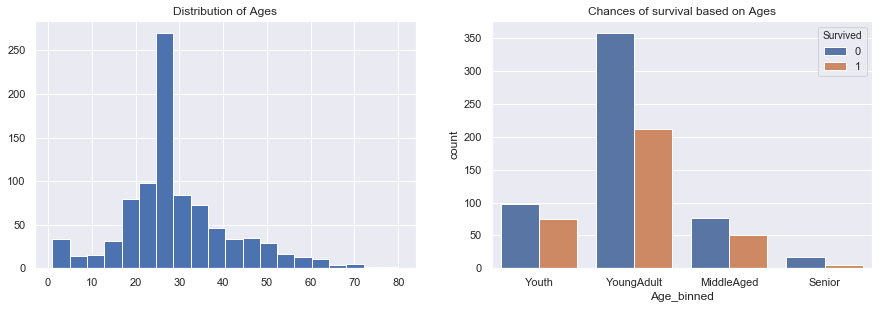

In [23]:
#Survival based on Age

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
train.Age.hist(bins=20)
plt.title('Distribution of Ages')
ax2 = fig.add_subplot(2,2,2)
sns.countplot(x='Age_binned',data=train,hue='Survived')
plt.title('Chances of survival based on Ages');

Majority of the passengers were aged between 20 and 40 and that age group had considerable more fatalities.

C:\Users\Peter\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


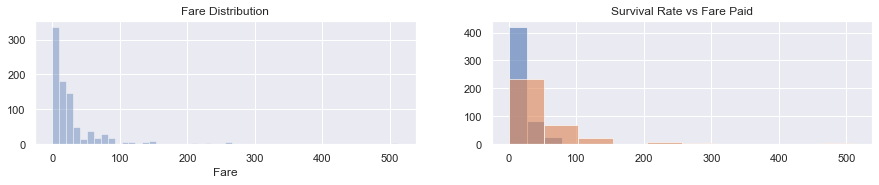

In [24]:
#Survival based on Fare paid

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
sns.distplot(a=train.Fare,kde=False)
plt.title('Fare Distribution')
ax2 = fig.add_subplot(2,2,2)
train.groupby('Survived').Fare.hist(alpha=0.6)
plt.title('Survival Rate vs Fare Paid');

In [25]:
train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


Passengers who paid higher fares were more likely to survive.

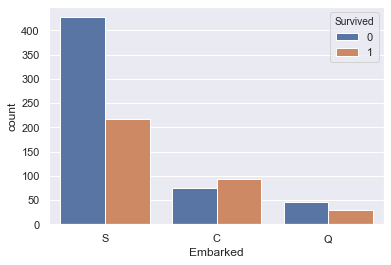

In [26]:
#Survival based on point of Embarkment

sns.countplot(x='Embarked', data=train, hue='Survived');

Passengers who boarded the Titanic from SouthHampton were not likely to survive

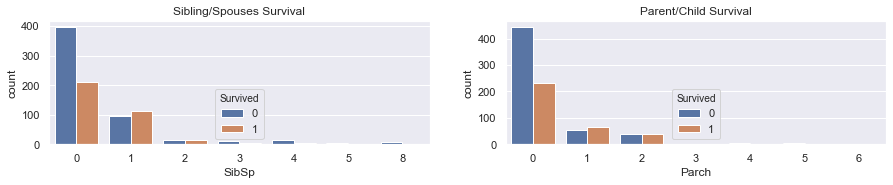

In [27]:
#SiblingSpouses on the Titanic

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
sns.countplot(x='SibSp',data=train,hue='Survived')
plt.title('Sibling/Spouses Survival')
ax2 = fig.add_subplot(2,2,2)
sns.countplot(x='Parch',data=train,hue='Survived')
plt.title('Parent/Child Survival');

## Data Splitting

In [28]:
X = pd.get_dummies(train[['Pclass','Sex','Fare','Age']],drop_first=True)
y = train.Survived.values

In [29]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')

logreg_pred = cross_val_score(logreg,X,y,scoring='accuracy',cv=10)

logreg_pred.mean()

0.7845011916922029

In [30]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb_pred = cross_val_score(gnb,X,y,scoring='accuracy',cv=10)

gnb_pred.mean()

0.7778095562365225

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt_pred = cross_val_score(dt,X,y,scoring='accuracy',cv=10)

dt_pred.mean()

0.7846521393712406

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,random_state=42)
                            

rf_pred = cross_val_score(rf,X,y,scoring='accuracy',cv=10)

rf_pred.mean()

0.7958756100329134

## Evaluating model performance

In [33]:
y_probas_forest = cross_val_predict(rf, X,y,cv=10,method='predict_proba')

In [34]:
from sklearn.metrics import roc_curve

y_scores_forest = y_probas_forest[:,1]

fpr_forest,tpr_forest,thresholds_forest = roc_curve(y,y_scores_forest)

In [35]:
y_score_logreg = cross_val_predict(logreg,X,y,cv=10,
                                   method='decision_function')

fpr_logreg, tpr_logreg,thresholds_logreg = roc_curve(y,y_score_logreg)

In [36]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

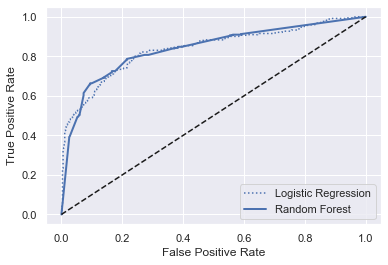

In [37]:
plt.plot(fpr_logreg, tpr_logreg, 'b:', label='Logistic Regression')
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc='best')
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

logreg_score = roc_auc_score(y,y_score_logreg)

logreg_score

0.8379829354807784

In [39]:
rf_score = roc_auc_score(y,y_scores_forest)

rf_score

0.8382439097135675

## Fine Tuning the Model

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,15]}]

grid_search = GridSearchCV(rf,param_grid,cv=10,scoring='accuracy',
                          return_train_score=True)

grid_search.fit(X,y)

C:\Users\Peter\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 15]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [41]:
grid_search.best_params_

{'n_estimators': 15}

In [42]:
final_model = grid_search.best_estimator_

final_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## Evaluate on Test Set

In [43]:
X_test =pd.get_dummies(test[['Pclass','Sex','Age','Fare']],drop_first=True)

In [44]:
X_test.Age.fillna(value=median_age,inplace=True)

In [45]:
median_fare = test.Fare.median()

In [46]:
X_test.Fare.fillna(value=median_fare,inplace=True)

In [47]:
X_test.isnull().sum()

Pclass      0
Age         0
Fare        0
Sex_male    0
dtype: int64

In [48]:
final_predictions = final_model.predict(X_test)

final_predictions

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [49]:
test['Survived'] = final_predictions

In [50]:
test[['PassengerId','Survived']].to_csv(r'C:\Users\Peter\Documents\Machine Learning Projects\SBSA Regression\Classification\Titanic\titanic\submission.csv',
                                        index=False)
                                